In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import sys
import matplotlib as mpl
sys.path.append("../analysisTools")
import plotTools as ptools
import mplhep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Combine

### output root files

In [4]:
base="/uscms/home/kyungmip/nobackup/CMSSW_11_3_4/src/HiggsAnalysis/CombinedLimit/SR_BDTv1/"

In [5]:
import os
import uproot
import pandas as pd
xs = pd.read_csv('/uscms/home/sbrightt/nobackup/iDMe/signal_xsec/MG5_aMC_v2_9_6/bin/signal_xsec_table.csv')
xs = xs[xs.alphaD=="aEM"]
xs['m1'] = xs.Mchi - xs.dMchi/2
xs['delta'] = xs.dMchi/xs.m1

In [6]:
#cut_setting = f"dPhiCut{xlim:.1f}_dxyCut{ylim:.2f}".replace(".","p")
cut_setting = 'BDTv1'
root_files = [f for f in os.listdir(base) if '.root' in f and cut_setting in f]

root_files

['higgsCombine.0p1_30_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_40_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_50_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_10_10_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_30_10_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_40_10_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_10_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_40_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_20_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_5_1_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_40_10_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_10_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_40_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p2_5_100_BDTv1.AsymptoticLimits.mH120.root',
 'higgsCombine.0p1_5_10_BDTv

In [7]:
m1s = []
cts = []
deltas = []
rs = []
rs_plus1 = []
rs_minus1 = []
rs_plus2 = []
rs_minus2 = []
xsecs = []

for rf in root_files:
    point = rf.split('.')[1]
    delta,m1,ct,SR = point.split("_")
    delta = float(delta.replace("p","."))
    m1 = float(m1.replace("p","."))
    ct = float(ct.replace("p","."))
    xsecs.append(xs[(xs.m1==m1)&(xs.delta==delta)&(xs.ct==ct)]['xsec(pb)'].iloc[0])
    deltas.append(delta)
    m1s.append(m1)
    cts.append(ct)
    with uproot.open(base+rf)['limit'] as rootf:
        lims = rootf['limit'].array().to_numpy()
    rs_minus2.append(lims[0])
    rs_minus1.append(lims[1])
    rs.append(lims[2])
    rs_plus1.append(lims[3])
    rs_plus2.append(lims[4])

lims = pd.DataFrame({
    "m1":m1s,
    "ct":cts,
    "delta":deltas,
    "r":rs,
    "rp1":rs_plus1,
    "rm1":rs_minus1,
    "rp2":rs_plus2,
    "rm2":rs_minus2,
    "xsec":xsecs
})

## Plot

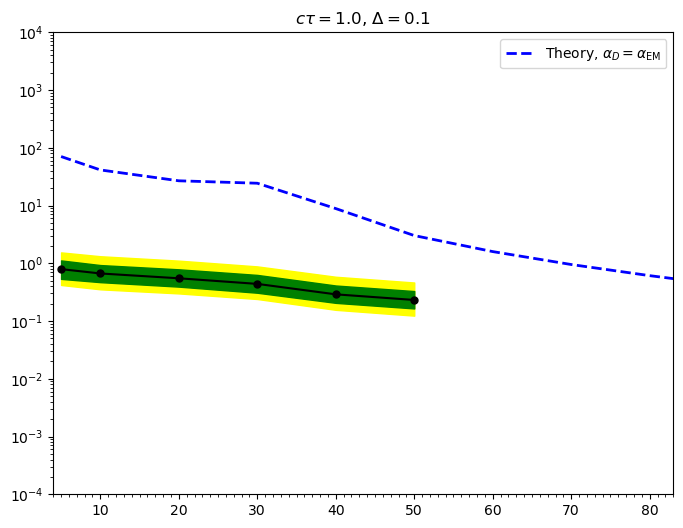

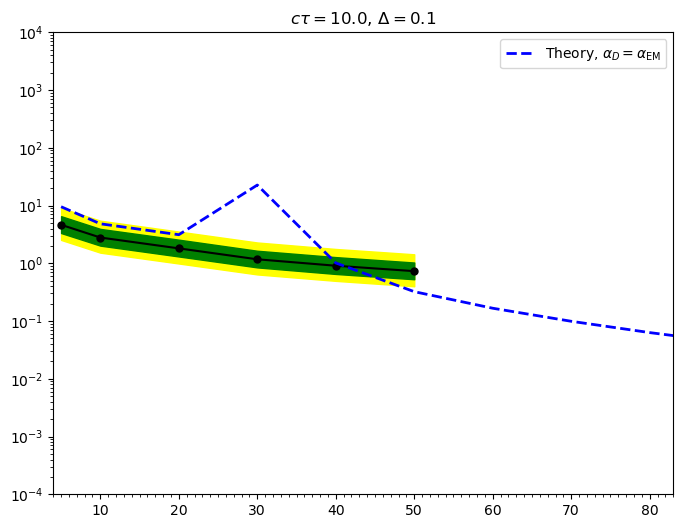

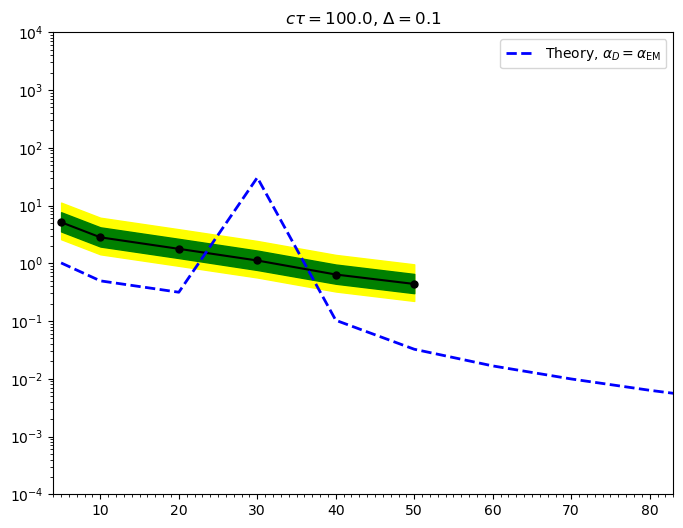

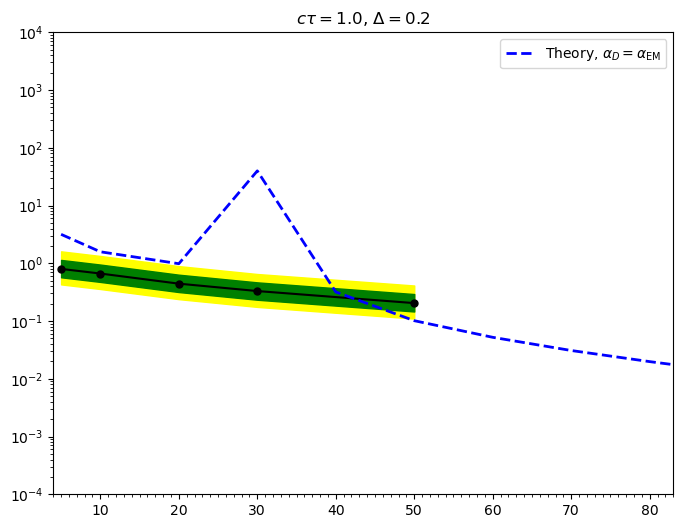

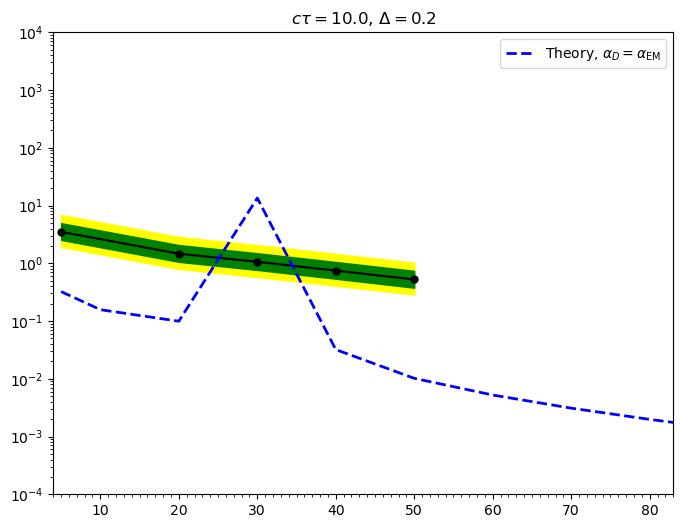

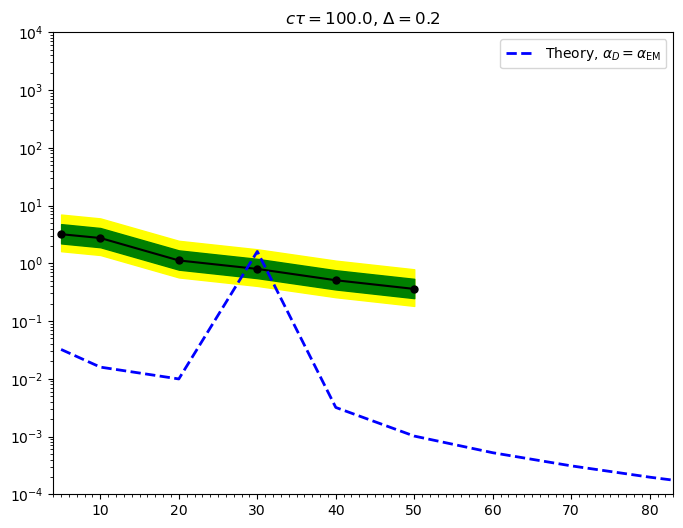

In [8]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

deltas = sorted(list(set(lims.delta)))
all_ctaus = sorted(list(set(lims.ct)))
for d in deltas:
    for i,ct in enumerate(all_ctaus):
        plt.figure(figsize=(8,6))
        mass1s = sorted(list(set(lims[(lims.delta==d)&(lims.ct==ct)].m1.array.to_numpy())))
        noms = []
        p1s = []
        m1s = []
        p2s = []
        m2s = []
        theory_xsec = xs[(xs.delta==d)&(xs.ct==ct)]["xsec(pb)"].array.to_numpy()
        theory_m1 = xs[(xs.delta==d)&(xs.ct==ct)]["m1"].array.to_numpy()
        srt = np.argsort(theory_m1)
        theory_m1 = theory_m1[srt]
        theory_xsec = theory_xsec[srt]
        for m1 in mass1s:
            r = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].r.iloc[0]
            rm1 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rm1.iloc[0]
            rp1 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rp1.iloc[0]
            rm2 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rm2.iloc[0]
            rp2 = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].rp2.iloc[0]
            xsec = lims[(lims.delta==d)&(lims.ct==ct)&(lims.m1==m1)].xsec.iloc[0]
            noms.append(r*xsec)
            m1s.append(rm1*xsec)
            p1s.append(rp1*xsec)
            m2s.append(rm2*xsec)
            p2s.append(rp2*xsec)
        plt.title(r"$c \tau = {0}$, $\Delta = {1}$".format(ct,d))
        plt.fill_between(mass1s,m2s,p2s,color="yellow")
        plt.fill_between(mass1s,m1s,p1s,color="green")
        plt.plot(mass1s,noms,color="black",marker=".",markersize=10)
        plt.plot(theory_m1,theory_xsec,color="blue",linestyle="--",linewidth=2,label=r"Theory, $\alpha_D = \alpha_\mathrm{EM}$")
        plt.legend()
        plt.ylim([1e-4,1e4])
        plt.yscale('log')
        plt.xlim([4,83])
        ax = plt.gca()
        ax.xaxis.set_major_locator(MultipleLocator(10))
        ax.xaxis.set_major_formatter('{x:.0f}')
        ax.xaxis.set_minor_locator(MultipleLocator(1))
        #plt.savefig(f"plots/expected_lims/delta{d}_ct{ct}_{cut_setting}.pdf")